In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.cluster.hierarchy as sch
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

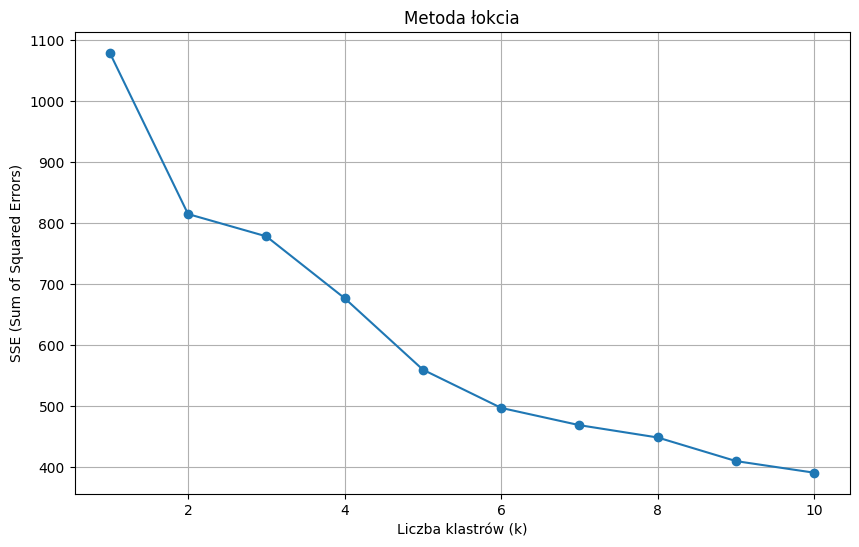

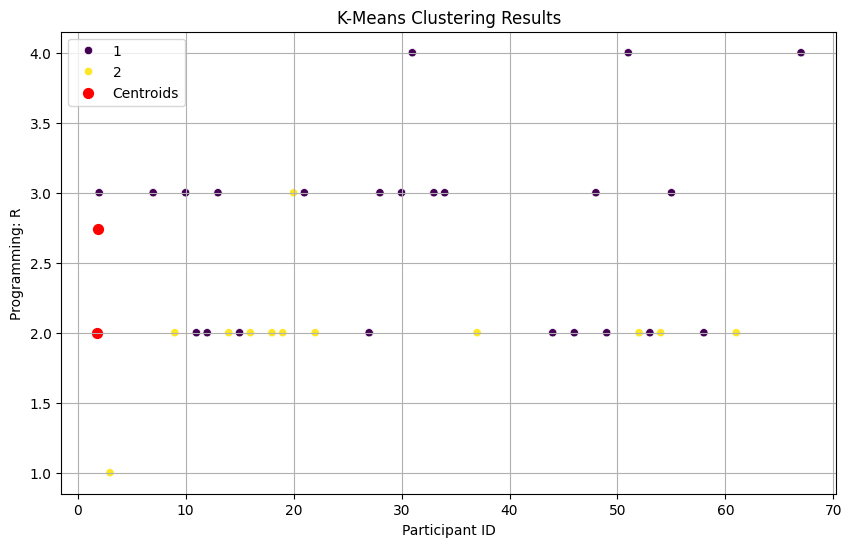

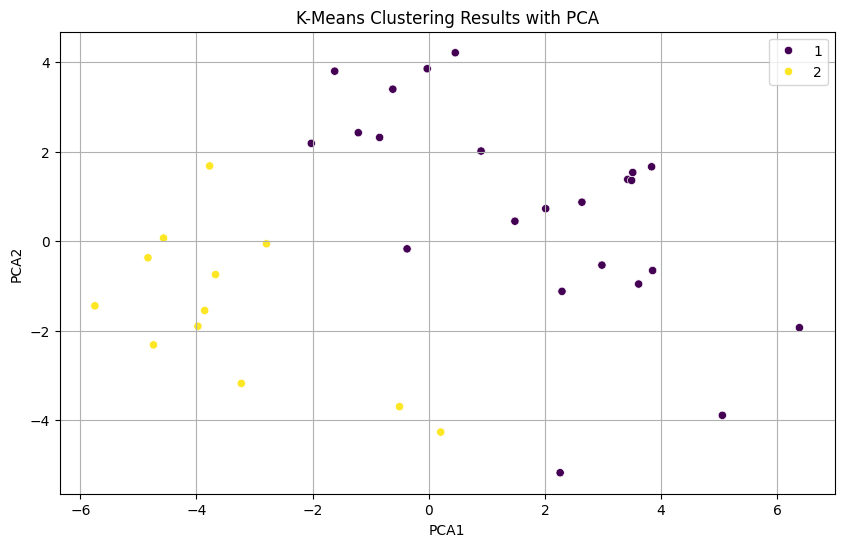

In [7]:
# Determine the current file path and the parent directory path
current_file_path = Path(__name__).resolve()
parent_directory_path = current_file_path.parent.parent

# Define the input file path
input_file_path = parent_directory_path / "data" / "03_Processed" / "03_Filtered_Selected_Features.csv"

# Load the filtered data from the CSV file
data = pd.read_csv(input_file_path)

text_columns = data.select_dtypes(include=['object']).columns
data_clean = data.drop(columns=text_columns)

data_clean_1 = data_clean.drop(columns=['Participant ID'])

# print(data_clean)

# Określenie liczby klastrów za pomocą metody łokcia
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_clean_1)
    sse.append(kmeans.inertia_)

# Wizualizacja metody łokcia
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Metoda łokcia')
plt.grid(True)

# Optimal number of clusters
optimal_clusters = 2

# Przeprowadzenie k-means clustering
kmeans = KMeans(n_clusters=optimal_clusters)
data_clean['Cluster'] = kmeans.fit_predict(data_clean_1)+1

# Wyświetlenie centroids
centroids = kmeans.cluster_centers_

# Dodanie etykiet klastrów do oryginalnych danych
data_clean['Cluster'] = kmeans.labels_+1

# Wyświetlenie wyników grupowania
# print(data_clean[['Participant ID', 'Cluster']])

# Opcjonalna wizualizacja wyników (dla pierwszych dwóch wymiarów)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_clean.iloc[:, 0], y=data_clean_1.iloc[:, 1], hue=data_clean['Cluster'], palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=50, c='red', label='Centroids')
plt.xlabel(data_clean.columns[0])
plt.ylabel(data_clean.columns[1])
plt.title('K-Means Clustering Results')
plt.legend()
plt.grid(True)
plt.show()

# Redukcja wymiarów za pomocą PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_clean_1)

# Dodanie komponentów PCA do oryginalnych danych
data_clean['PCA1'] = data_pca[:, 0]
data_clean['PCA2'] = data_pca[:, 1]

# Opcjonalna wizualizacja wyników (dla pierwszych dwóch komponentów PCA)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data_clean, palette='viridis', legend='full')
plt.title('K-Means Clustering Results with PCA')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Weryfikacja poprawności klastrów
silhouette_avg = silhouette_score(data_clean_1, data_clean['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

print(f'Inertia: {kmeans.inertia_}')

davies_bouldin = davies_bouldin_score(data_clean_1, data_clean['Cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.21607211248081729
Inertia: 814.4855072463768
Davies-Bouldin Index: 1.606107942590081


Cluster 1 Participant IDs: [3, 9, 14, 16, 18, 19, 20, 22, 37, 52, 54, 61]
Cluster 2 Participant IDs: [2, 7, 10, 11, 12, 13, 15, 21, 27, 28, 30, 31, 33, 34, 44, 46, 48, 49, 51, 53, 55, 58, 67]


Cluster 1 Correlation Matrix:
                                                    Programming: R  \
Programming: R                                        1.000000e+00   
Programming: Python                                   1.873172e-01   
Programming: Bash                                    -3.212463e-02   
Version Control: GIT                                 -4.055536e-01   
Containers: Docker                                   -3.212463e-02   
CLI: (np. Bash, PowerShell, CMD)                      5.445771e-17   
Front End: (HTML, JavaScript, CSS)                    2.503131e-01   
Databases: SQL                                       -3.244428e-01   
Databases: NoSQL                                      3.582872e-02   
Cloud: Azure                                          3.943888e-01   
Cloud:

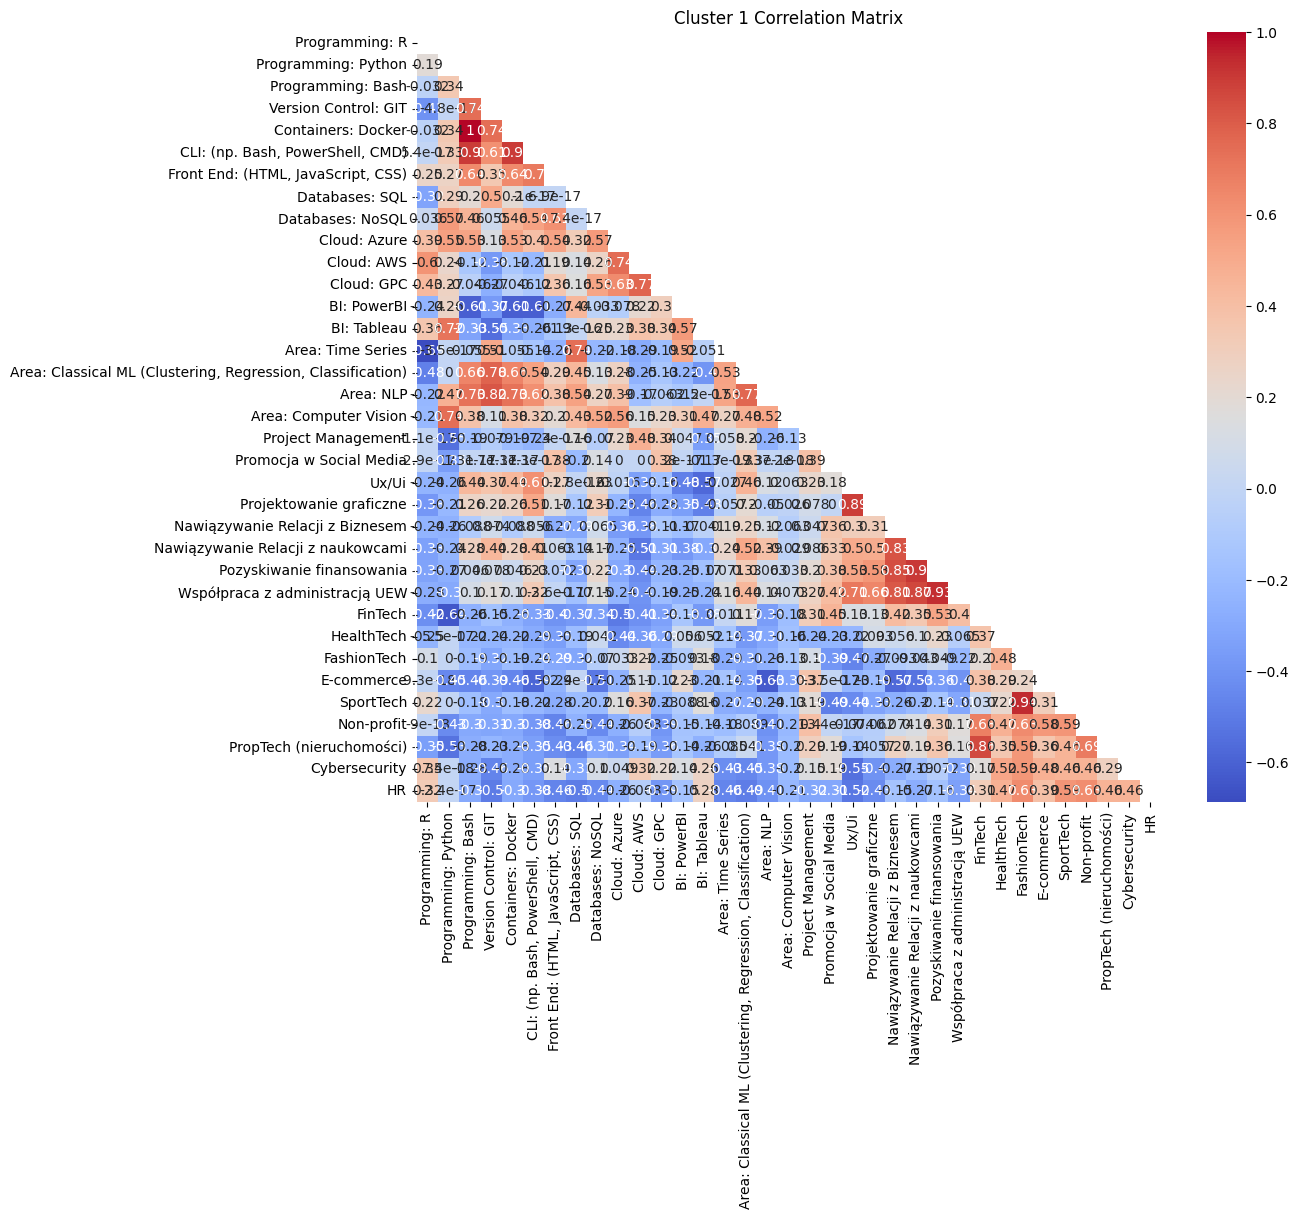

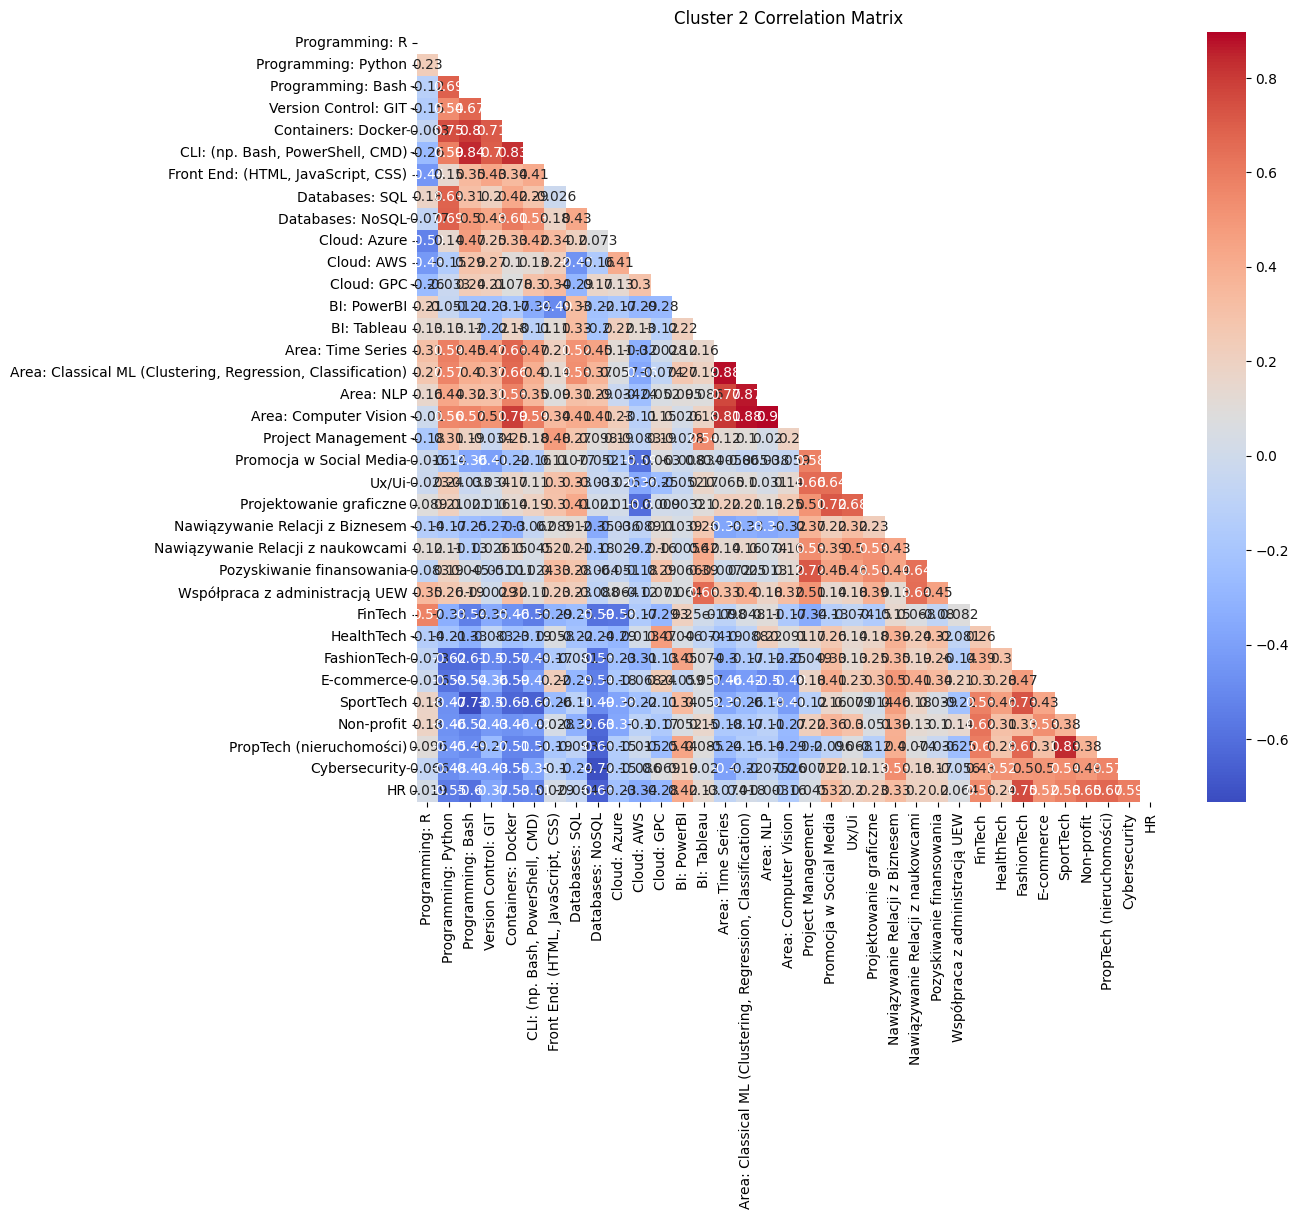

In [33]:
# Wyświetlenie wyników grupowania
for cluster in range(1, optimal_clusters+1):
    cluster_ids = data_clean[data_clean['Cluster'] == cluster]['Participant ID'].tolist()
    print(f'Cluster {cluster} Participant IDs: {cluster_ids}')
print('\n')

# Sprawdzanie korelacji w poszczególnych klastrach
for cluster in range(1, optimal_clusters):
    cluster_data = data_clean_1[data_clean['Cluster'] == cluster]
    print(f'Cluster {cluster} Correlation Matrix:')
    print(cluster_data.corr())
    print('\n')

# Wizualizacja macierzy korelacji dla każdego klastra
for cluster in range(1, optimal_clusters + 1):
    cluster_data = data_clean_1[data_clean['Cluster'] == cluster]
    correlation_matrix = cluster_data.corr()
    
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
    plt.title(f'Cluster {cluster} Correlation Matrix')
    plt.show()